In [1]:
from dotenv import load_dotenv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys
import os
sys.path.append(os.path.abspath('../scripts'))

In [3]:
from load_data import load_data_from_postgres, load_data_using_sqlalchemy
from sql_queries import execute_telecom_queries


In [4]:
# Load environment variables from .env file
load_dotenv()

# Fetch database connection parameters from environment variables
DB_HOST = os.getenv("DB_HOST")
DB_PORT = os.getenv("DB_PORT")
DB_NAME = os.getenv("DB_NAME")
DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")

In [5]:
# Define your SQL query
query = "SELECT * FROM xdr_data;"  # Replace with your actual table name

# Load data from PostgreSQL
df = load_data_from_postgres(query)

# Display the first few rows of the dataframe
if df is not None:
    print("Successfully loaded the data")
else:
    print("Failed to load data.")


c:\Users\Tsega KisPay\Documents\GitHub\TellCo-Telecom-Analytics-Dashboard\scripts\load_data.py:38: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


Successfully loaded the data


In [6]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

### Continue with EDA

In [8]:
# Check for missing values
df.isnull().sum()


Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

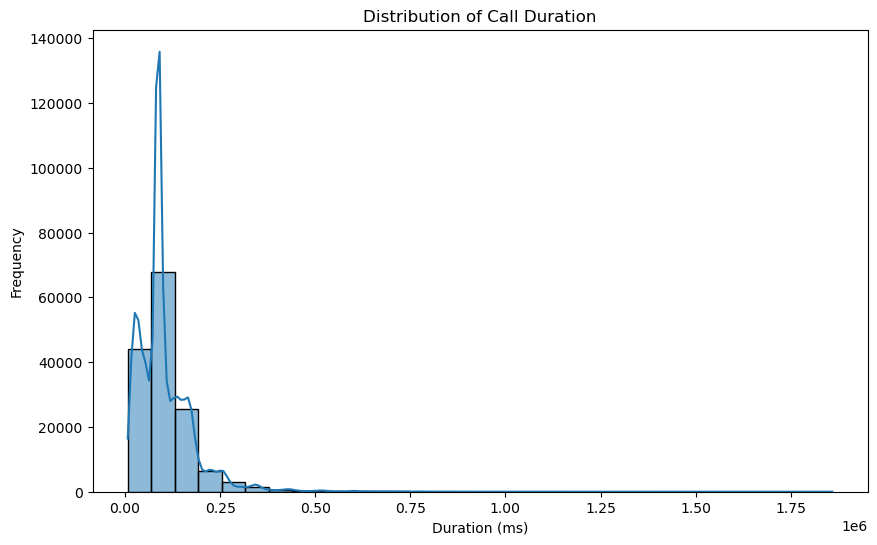

In [9]:
# Histogram for a specific column
plt.figure(figsize=(10, 6))
sns.histplot(df['Dur. (ms)'], bins=30, kde=True)
plt.title('Distribution of Call Duration')
plt.xlabel('Duration (ms)')
plt.ylabel('Frequency')
plt.show()


In [10]:
# Average duration by Last Location Name
avg_duration_by_location = df.groupby('Last Location Name')['Dur. (ms)'].mean().reset_index()
print(avg_duration_by_location.sort_values(by='Dur. (ms)', ascending=False))


         Last Location Name  Dur. (ms)
33951               T53539A  1177517.0
1342   CELL_208_20_520166_7  1134225.0
6056                D20985B  1038128.0
17025               D94074C  1010097.0
37089               T76656C   985972.0
...                     ...        ...
20518               G92776B     7327.0
18917               G52206C     7326.0
20510               G92604C     7267.0
18612               G30104B     7258.0
18635               G30532C     7146.0

[45547 rows x 2 columns]


In [11]:
db_url = f"postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"
execute_telecom_queries(db_url)

{'unique_imsi_count':    unique_imsi_count
 0             107265,
 'average_duration':    average_duration
 0     104608.560347,
 'total_data_usage':            IMSI  total_ul_bytes  total_dl_bytes
 0           NaN    2.350613e+10    2.580162e+11
 1  2.082017e+14    6.894830e+08    8.156743e+09
 2  2.082021e+14    7.034786e+08    7.811295e+09
 3  2.082010e+14    7.295774e+08    7.770043e+09
 4  2.082010e+14    5.815688e+08    7.309542e+09
 5  2.082014e+14    6.696507e+08    7.301517e+09
 6  2.082019e+14    6.242603e+08    7.081602e+09
 7  2.082014e+14    4.050610e+08    6.903440e+09
 8  2.082003e+14    5.215189e+08    6.610852e+09
 9  2.082017e+14    4.712445e+08    6.400774e+09,
 'avg_rtt_by_location':          Last Location Name   avg_rtt_dl  avg_rtt_ul
 0                   T10450C  6314.714286    4.571429
 1     9.16456699821824E+015  6128.888889    6.444444
 2                   D19121A  5553.166667    2.083333
 3                   L88381B  1851.727273    9.909091
 4                